#Prerequisite

In [82]:
!pip install scikit-learn-intelex

In [83]:
import os
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.ensemble import VotingClassifier

In [85]:
!gdown 1d-n3DRMh8YZwAd5pxryRZMiqLKH4dPPo
!gdown 1GzBgV34sITnhenBS-E21ZvQ9MU8SwMMa

Downloading...
From: https://drive.google.com/uc?id=1d-n3DRMh8YZwAd5pxryRZMiqLKH4dPPo
To: /content/labels1.csv
100% 3.89k/3.89k [00:00<00:00, 11.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GzBgV34sITnhenBS-E21ZvQ9MU8SwMMa
To: /content/data1.csv
100% 824M/824M [00:08<00:00, 100MB/s] 


In [86]:
data = pd.read_csv("/content/data1.csv")

In [87]:
labels = pd.read_csv("/content/labels1.csv")

In [88]:
data.info

<bound method DataFrame.info of                         Unnamed: 0  ENSG00000000003.15  ENSG00000000005.6  \
0     TCGA-AJ-A3NH-11A-11R-A22K-07            1.565076           0.066810   
1     TCGA-AX-A05Y-11A-11R-A27V-07            0.975542           0.159958   
2     TCGA-FL-A1YN-11A-11R-A32Y-07            1.277174           0.058654   
3     TCGA-FL-A1YU-11A-11R-A32Y-07            1.319747           0.039811   
4     TCGA-AJ-A3NC-11A-11R-A22K-07            1.017179           0.158393   
...                            ...                 ...                ...   
1292  TCGA-JY-A93C-01A-11R-A38D-31            1.536423           0.003977   
1293  TCGA-JY-A6FH-01A-11R-A336-31            0.789686           0.003762   
1294  TCGA-L5-A8NF-01A-11R-A37I-31            0.755745           0.000000   
1295  TCGA-VR-AA4D-01A-11R-A37I-31            1.252630           0.007961   
1296  TCGA-IG-A3QL-01A-11R-A24K-31            1.400346           0.003331   

      ENSG00000000419.13  ENSG00000000457.1

In [89]:
labels.info

<bound method DataFrame.info of       0
0     0
1     0
2     0
3     0
4     0
...  ..
1291  4
1292  4
1293  4
1294  4
1295  4

[1296 rows x 1 columns]>

In [90]:
columns_to_remove = []
for i in range(len(data.columns)):
  if(data.columns[i].find("Unnamed")>=0):
    columns_to_remove.append(data.columns[i])
data = data.drop(labels = columns_to_remove, axis = 1, inplace = False)


In [91]:
X = data.values
y = labels.values
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =7, shuffle = True, stratify = y)

In [92]:
# Normalize Standardize features by removing the mean and scaling to unit variance.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Logistic Regression

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelLR = LogisticRegression(max_iter=500, C=20, penalty="l2", random_state=27, solver="lbfgs")
fit = modelLR.fit(X_train, np.ravel(y_train))

y_predLR = modelLR.predict(X_test)

In [94]:
accuracyLR = accuracy_score(y_test, y_predLR)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracyLR * 100))

macro_precision = precision_score(y_test, y_predLR, average='macro')
print("Logistic Regression Macro Precision: {:.4f}".format(macro_precision))

weighted_precision = precision_score(y_test, y_predLR, average='weighted')
print("Logistic Regression Weighted Precision: {:.4f}".format(weighted_precision))

macro_recall = recall_score(y_test, y_predLR, average='macro')
print("Logistic Regression Macro Recall: {:.4f}".format(macro_recall))

weighted_recall = recall_score(y_test, y_predLR, average='weighted')
print("Logistic Regression Weighted Recall: {:.4f}".format(weighted_recall))

macro_f1 = f1_score(y_test, y_predLR, average='macro')
print("Logistic Regression Macro F1-Score: {:.4f}".format(macro_f1))

weighted_f1 = f1_score(y_test, y_predLR, average='weighted')
print("Logistic Regression Weighted F1-Score: {:.4f}".format(weighted_f1))

cf_matrixLR = confusion_matrix(y_test, y_predLR)
print("\nLogistic Regression Confusion Matrix:")
print(cf_matrixLR)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_predLR, digits=4))

Logistic Regression Accuracy: 98.08%
Logistic Regression Macro Precision: 0.9582
Logistic Regression Weighted Precision: 0.9820
Logistic Regression Macro Recall: 0.9812
Logistic Regression Weighted Recall: 0.9808
Logistic Regression Macro F1-Score: 0.9690
Logistic Regression Weighted F1-Score: 0.9809

Logistic Regression Confusion Matrix:
[[ 24   0   0   0   1]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  3   0   1  70   0]
 [  0   0   0   0  37]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.8889    0.9600    0.9231        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9459    0.9722        74
           4     0.9737    1.0000    0.9867        37

    accuracy                         0.9808       260
   macro avg     0.9582    0.9812    0.9690       260
weighted avg     0.9820    0.9808    0.9809       260



In [95]:
LR = [accuracyLR,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_f1,weighted_f1]

#Random Forest

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=50, criterion="entropy", min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=False, n_jobs=-1)

fit = modelRF.fit(X_train, np.ravel(y_train))

y_predRF = modelRF.predict(X_test)


In [97]:
accuracyRF = accuracy_score(y_test, y_predRF)
print("Random Forest Accuracy: {:.2f}%".format(accuracyRF * 100))

macro_precision = precision_score(y_test, y_predRF, average='macro')
print("Random Forest Macro Precision: {:.4f}".format(macro_precision))

weighted_precision = precision_score(y_test, y_predRF, average='weighted')
print("Random Forest Weighted Precision: {:.4f}".format(weighted_precision))

macro_recall = recall_score(y_test, y_predRF, average='macro')
print("Random Forest Macro Recall: {:.4f}".format(macro_recall))

weighted_recall = recall_score(y_test, y_predRF, average='weighted')
print("Random Forest Weighted Recall: {:.4f}".format(weighted_recall))

macro_f1 = f1_score(y_test, y_predRF, average='macro')
print("Random Forest Macro F1-Score: {:.4f}".format(macro_f1))

weighted_f1 = f1_score(y_test, y_predRF, average='weighted')
print("Random Forest Weighted F1-Score: {:.4f}".format(weighted_f1))

cf_matrixRF = confusion_matrix(y_test, y_predRF)
print("\nRandom Forest Confusion Matrix:")
print(cf_matrixRF)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_predRF, digits=4))

Random Forest Accuracy: 98.46%
Random Forest Macro Precision: 0.9671
Random Forest Weighted Precision: 0.9851
Random Forest Macro Recall: 0.9786
Random Forest Weighted Recall: 0.9846
Random Forest Macro F1-Score: 0.9723
Random Forest Weighted F1-Score: 0.9846

Random Forest Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.9846    0.9846       260



In [98]:
RF = [accuracyRF,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_f1,weighted_f1]

#Gradient Boosting

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_XGBoost = XGBClassifier(n_estimators=50)

fit = model_XGBoost.fit(X_train, np.ravel(y_train))

y_predXGB = model_XGBoost.predict(X_test)



In [100]:
accuracyXGB = accuracy_score(y_test, y_predXGB)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracyXGB * 100))

macro_precision = precision_score(y_test, y_predXGB, average='macro')
print("Gradient Boosting Macro Precision: {:.4f}".format(macro_precision))

weighted_precision = precision_score(y_test, y_predXGB, average='weighted')
print("Gradient Boosting Weighted Precision: {:.4f}".format(weighted_precision))

macro_recall = recall_score(y_test, y_predXGB, average='macro')
print("Gradient Boosting Macro Recall: {:.4f}".format(macro_recall))

weighted_recall = recall_score(y_test, y_predXGB, average='weighted')
print("Gradient Boosting Weighted Recall: {:.4f}".format(weighted_recall))

macro_f1 = f1_score(y_test, y_predXGB, average='macro')
print("Gradient Boosting Macro F1-Score: {:.4f}".format(macro_f1))

weighted_f1 = f1_score(y_test, y_predXGB, average='weighted')
print("Gradient Boosting Weighted F1-Score: {:.4f}".format(weighted_f1))

cf_matrixXGB = confusion_matrix(y_test, y_predXGB)
print("\nGradient Boosting Confusion Matrix:")
print(cf_matrixXGB)

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_predXGB, digits=4))

Gradient Boosting Accuracy: 98.46%
Gradient Boosting Macro Precision: 0.9671
Gradient Boosting Weighted Precision: 0.9851
Gradient Boosting Macro Recall: 0.9786
Gradient Boosting Weighted Recall: 0.9846
Gradient Boosting Macro F1-Score: 0.9723
Gradient Boosting Weighted F1-Score: 0.9846

Gradient Boosting Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.9846    0.9846       260



In [101]:
XGB = [accuracyXGB,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_f1,weighted_f1]

#Max Voting Ensemble Learning

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

models = [('RandomForest', modelRF), ('LogisticRegression', modelLR), ('XGBoost', model_XGBoost)]

voting_clf = VotingClassifier(estimators=models, voting='hard')

voting_clf.fit(X_train, np.ravel(y_train))

y_pred_max_ensemble = voting_clf.predict(X_test)



In [103]:
accuracyMV = accuracy_score(y_test, y_pred_max_ensemble)
print("Max Voting Ensemble Accuracy: {:.2f}%".format(accuracyMV * 100))

macro_precision = precision_score(y_test, y_pred_max_ensemble, average='macro')
print("Max Voting Ensemble Macro Precision: {:.4f}".format(macro_precision))

weighted_precision = precision_score(y_test, y_pred_max_ensemble, average='weighted')
print("Max Voting Ensemble Weighted Precision: {:.4f}".format(weighted_precision))

macro_recall = recall_score(y_test,y_pred_max_ensemble, average='macro')
print("Max Voting Ensemble Macro Recall: {:.4f}".format(macro_recall))

weighted_recall = recall_score(y_test, y_pred_max_ensemble, average='weighted')
print("Max Voting Ensemble Weighted Recall: {:.4f}".format(weighted_recall))

macro_f1 = f1_score(y_test, y_pred_max_ensemble, average='macro')
print("Max Voting Ensemble Macro F1-Score: {:.4f}".format(macro_f1))

weighted_f1 = f1_score(y_test, y_pred_max_ensemble, average='weighted')
print("Max Voting Ensemble Weighted F1-Score: {:.4f}".format(weighted_f1))

cf_matrixMV = confusion_matrix(y_test, y_pred_max_ensemble)
print("\nMax Voting Ensemble Confusion Matrix:")
print(cf_matrixMV)

print("\nMax Voting Ensemble Classification Report:")
print(classification_report(y_test, y_pred_max_ensemble, digits=4))

Max Voting Ensemble Accuracy: 98.46%
Max Voting Ensemble Macro Precision: 0.9671
Max Voting Ensemble Weighted Precision: 0.9851
Max Voting Ensemble Macro Recall: 0.9786
Max Voting Ensemble Weighted Recall: 0.9846
Max Voting Ensemble Macro F1-Score: 0.9723
Max Voting Ensemble Weighted F1-Score: 0.9846

Max Voting Ensemble Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Max Voting Ensemble Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.9846    0.9846       260



In [104]:
MV = [accuracyMV,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_f1,weighted_f1]

# Average Voting Ensemble Learning

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

models = [('RandomForest', modelRF), ('LogisticRegression', modelLR), ('XGBoost', model_XGBoost)]

voting_clf = VotingClassifier(estimators=models, voting='soft')

voting_clf.fit(X_train, np.ravel(y_train))

y_pred_avg_ensemble = voting_clf.predict(X_test)


In [106]:
accuracyAV = accuracy_score(y_test, y_pred_avg_ensemble)
print("Average Voting Ensemble Accuracy: {:.2f}%".format(accuracyAV * 100))

macro_precision = precision_score(y_test, y_pred_avg_ensemble, average='macro')
print("Average Voting Ensemble Macro Precision: {:.4f}".format(macro_precision))

weighted_precision = precision_score(y_test, y_pred_avg_ensemble, average='weighted')
print("Average Voting Ensemble Weighted Precision: {:.4f}".format(weighted_precision))

macro_recall = recall_score(y_test,y_pred_avg_ensemble, average='macro')
print("Average Voting Ensemble Macro Recall: {:.4f}".format(macro_recall))

weighted_recall = recall_score(y_test, y_pred_avg_ensemble, average='weighted')
print("Average Voting Ensemble Weighted Recall: {:.4f}".format(weighted_recall))

macro_f1 = f1_score(y_test, y_pred_avg_ensemble, average='macro')
print("Average Voting Ensemble Macro F1-Score: {:.4f}".format(macro_f1))

weighted_f1 = f1_score(y_test, y_pred_avg_ensemble, average='weighted')
print("Average Voting Ensemble Weighted F1-Score: {:.4f}".format(weighted_f1))

cf_matrixAV = confusion_matrix(y_test, y_pred_avg_ensemble)
print("\nAverage Voting Ensemble Confusion Matrix:")
print(cf_matrixAV)

print("\nAverage Voting Ensemble Classification Report:")
print(classification_report(y_test, y_pred_avg_ensemble, digits=4))

Average Voting Ensemble Accuracy: 98.46%
Average Voting Ensemble Macro Precision: 0.9671
Average Voting Ensemble Weighted Precision: 0.9851
Average Voting Ensemble Macro Recall: 0.9786
Average Voting Ensemble Weighted Recall: 0.9846
Average Voting Ensemble Macro F1-Score: 0.9723
Average Voting Ensemble Weighted F1-Score: 0.9846

Average Voting Ensemble Confusion Matrix:
[[ 23   0   0   0   2]
 [  0 111   0   0   0]
 [  0   0  13   0   0]
 [  1   0   1  72   0]
 [  0   0   0   0  37]]

Average Voting Ensemble Classification Report:
              precision    recall  f1-score   support

           0     0.9583    0.9200    0.9388        25
           1     1.0000    1.0000    1.0000       111
           2     0.9286    1.0000    0.9630        13
           3     1.0000    0.9730    0.9863        74
           4     0.9487    1.0000    0.9737        37

    accuracy                         0.9846       260
   macro avg     0.9671    0.9786    0.9723       260
weighted avg     0.9851    0.

In [107]:
AV = [accuracyAV,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_f1,weighted_f1]

# Representation

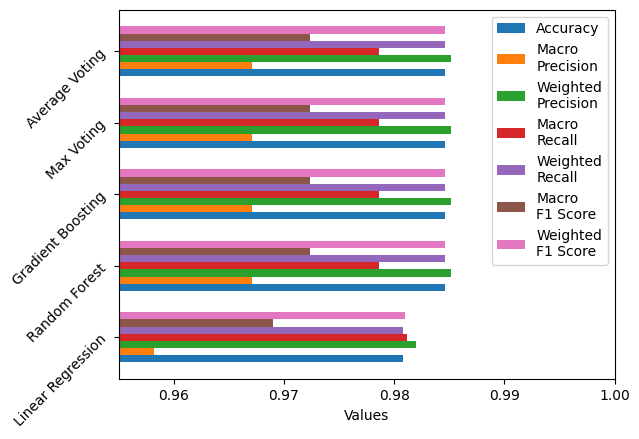

In [147]:
import matplotlib.pyplot as plt
import numpy as np


models=['Linear Regression','Random Forest','Gradient Boosting','Max Voting','Average Voting']

acc=[LR[0],RF[0],XGB[0],MV[0],AV[0]]
mPr=[LR[1],RF[1],XGB[1],MV[1],AV[1]]
wPr=[LR[2],RF[2],XGB[2],MV[2],AV[2]]
mR=[LR[3],RF[3],XGB[3],MV[3],AV[3]]
wR=[LR[4],RF[4],XGB[4],MV[4],AV[4]]
mF1=[LR[5],RF[5],XGB[5],MV[5],AV[5]]
wF1=[LR[6],RF[6],XGB[6],MV[6],AV[6]]

fig, ax = plt.subplots()

bar_width = 0.1
bar_positions = np.arange(len(models))

ax.barh(bar_positions - 3 * bar_width, acc, bar_width, label='Accuracy')
ax.barh(bar_positions - 2 * bar_width, mPr, bar_width, label='Macro\nPrecision')
ax.barh(bar_positions - bar_width, wPr, bar_width, label='Weighted\nPrecision')
ax.barh(bar_positions, mR, bar_width, label='Macro\nRecall')
ax.barh(bar_positions + bar_width, wR, bar_width, label='Weighted\nRecall')
ax.barh(bar_positions + 2 * bar_width, mF1, bar_width, label='Macro\nF1 Score')
ax.barh(bar_positions + 3 * bar_width, wF1, bar_width, label='Weighted\nF1 Score')


ax.set_yticks(bar_positions)
ax.set_yticklabels(models, rotation=45, ha='right')
ax.set_xlabel('Values')

ax.legend()

plt.xlim(0.955,1)
plt.show()

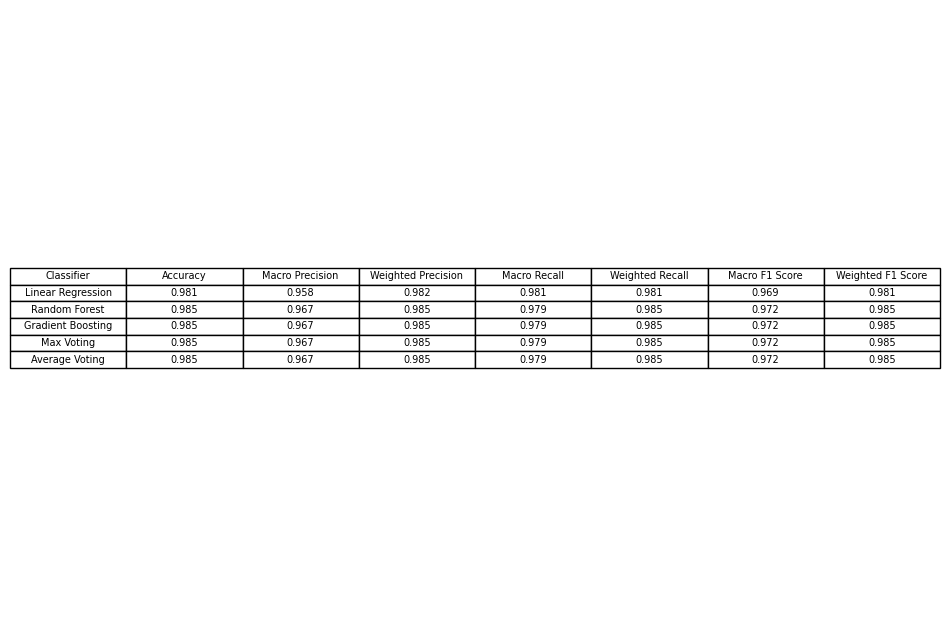

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

headers = ['Classifier', 'Accuracy', 'Macro Precision', 'Weighted Precision', 'Macro Recall', 'Weighted Recall', 'Macro F1 Score', 'Weighted F1 Score']

data = list(zip(models, acc, mPr, wPr, mR, wR, mF1, wF1))

formatted_data = []
for row in data:
    formatted_row = [row[0]] + [f'{value:.3f}' for value in row[1:]]
    formatted_data.append(formatted_row)
# print(formatted_data)

table_cells = [ax.table(cellText=formatted_data, cellLoc='center', loc='center', colLabels=headers)]
for cell in table_cells:
    cell.auto_set_font_size(False)
    cell.set_fontsize(7)

plt.show()